# Non-Linear Relationship detection: PREDICTIVE POWER SCORE (PPS)

### Benefits:
- Un-simetric correlation.
- Non-linear correlation.
- Categorical and numerical variables.

### References:
- [TowardsDataScience - RIP correlation. Introducing the Predictive Power Score](https://towardsdatascience.com/rip-correlation-introducing-the-predictive-power-score-3d90808b9598)
- [Pypi Doc - ppscore](https://pypi.org/project/ppscore/)

In [1]:
!pip install ppscore

  Using cached ppscore-1.3.0-py2.py3-none-any.whl


In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import ppscore as pps

## example non-linear correlation

In [3]:
# data creation
df = pd.DataFrame()
df["x"] = np.random.uniform(-2, 2, 1_000_000)
df["error"] = np.random.uniform(-0.5, 0.5, 1_000_000)
df["y"] = df["x"] * df["x"] + df["error"]

<AxesSubplot:xlabel='x', ylabel='y'>

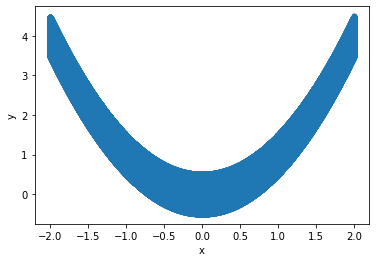

In [5]:
# scatter plot
df.plot(kind = 'scatter', x = 'x', y = 'y')

In [4]:
pps.score(df, "x", "y")

{'x': 'x',
 'y': 'y',
 'ppscore': 0.6617330757896223,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 1.0201916592762696,
 'model_score': 0.34509709468846533,
 'model': DecisionTreeRegressor()}

In [37]:
f'PPS(x,y) = {pps.score(df, "x", "y")["ppscore"]} / PPS(y,x) = {pps.score(df, "y", "x")["ppscore"]}'

'PPS(x,y) = 0.6617330757896223 / PPS(y,x) = 0'

In [6]:
pps.predictors(df, "y")

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,x,y,0.661733,regression,True,mean absolute error,1.020192,0.345097,DecisionTreeRegressor()
1,error,y,0.000000,regression,True,mean absolute error,1.020192,1.362283,DecisionTreeRegressor()


In [7]:
pps.matrix(df)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,x,x,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,x,error,0.000000,regression,True,mean absolute error,0.252852,0.345108,DecisionTreeRegressor()
2,x,y,0.661733,regression,True,mean absolute error,1.020192,0.345097,DecisionTreeRegressor()
3,error,x,0.000000,regression,True,mean absolute error,1.004092,1.338011,DecisionTreeRegressor()
4,error,error,1.000000,predict_itself,True,None,0.000000,1.000000,None
5,error,y,0.000000,regression,True,mean absolute error,1.020192,1.362283,DecisionTreeRegressor()
6,y,x,0.000000,regression,True,mean absolute error,1.004092,1.096308,DecisionTreeRegressor()
7,y,error,0.000000,regression,True,mean absolute error,0.252852,0.285206,DecisionTreeRegressor()
8,y,y,1.000000,predict_itself,True,None,0.000000,1.000000,None


<AxesSubplot:xlabel='x', ylabel='ppscore'>

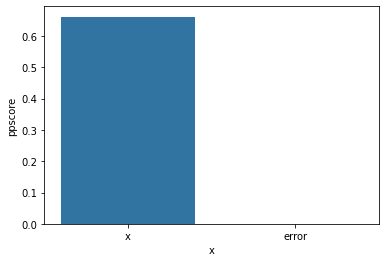

In [8]:
import seaborn as sns
predictors_df = pps.predictors(df, y="y")
sns.barplot(data=predictors_df, x="x", y="ppscore")

<AxesSubplot:xlabel='x', ylabel='y'>

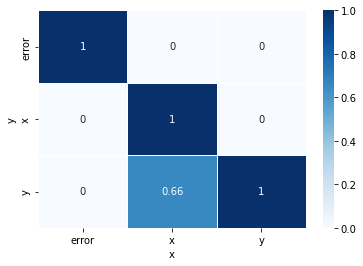

In [9]:
import seaborn as sns
matrix_df = pps.matrix(df)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

## Titanic dataset

In [10]:
import seaborn
data = seaborn.load_dataset('titanic')
data.shape

(891, 15)

### Pearson correlation

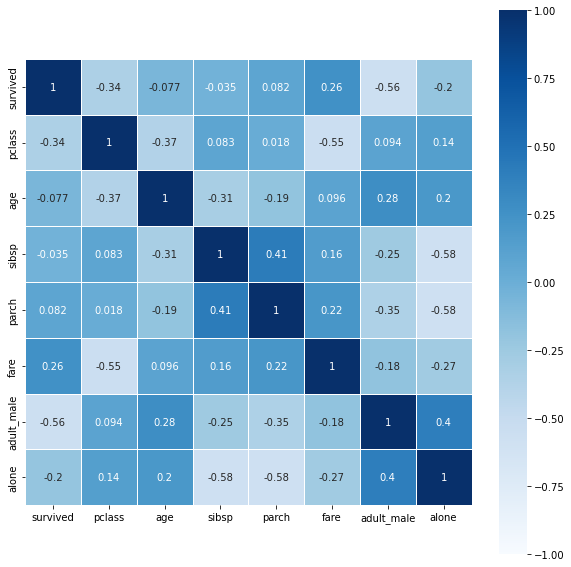

In [19]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(data.corr(), vmin=-1, vmax=1, cmap="Blues", linewidths=0.5, annot=True, square = True, ax = ax)
plt.show()

### PPS

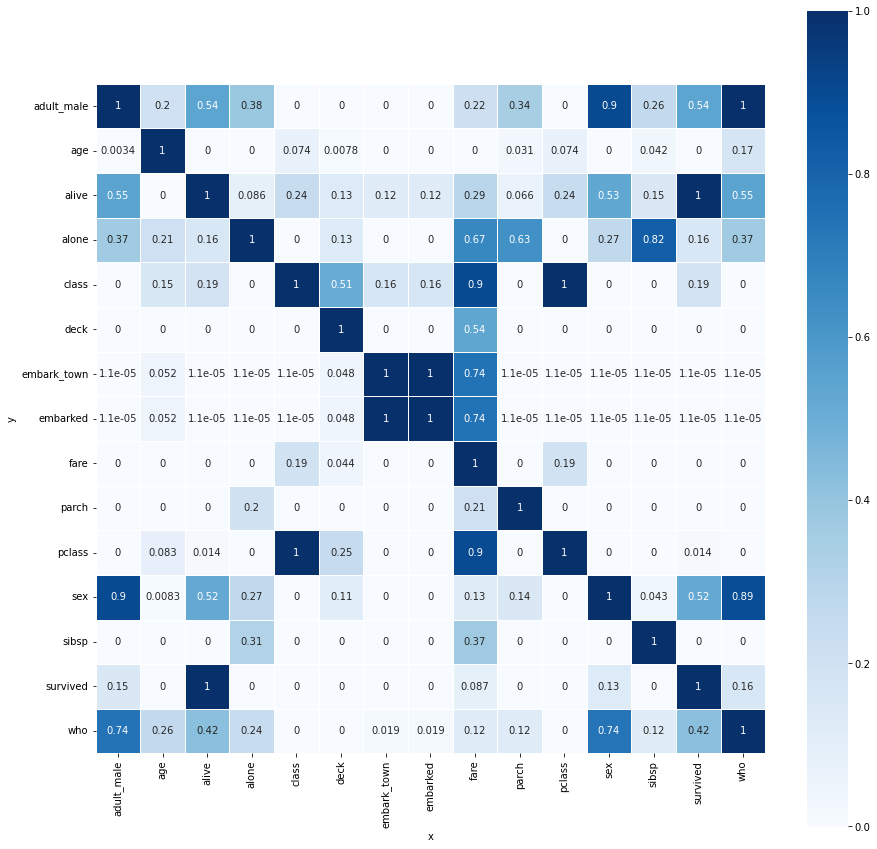

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (15,15))
matrix_data = pps.matrix(data)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
sns.heatmap(matrix_data, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True, square = True, ax = ax)
plt.show()

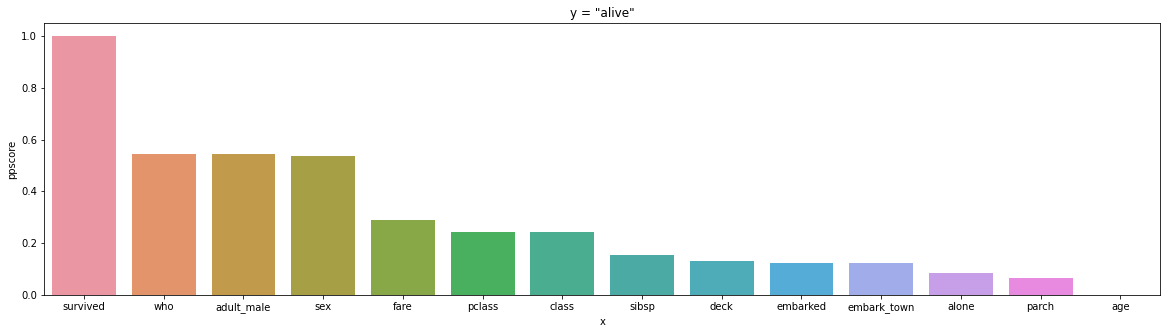

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (20, 5))
predictors_data = pps.predictors(data, y="alive")
sns.barplot(data=predictors_data, x="x", y="ppscore", ax = ax)
ax.set_title('y = "alive"')
plt.show()

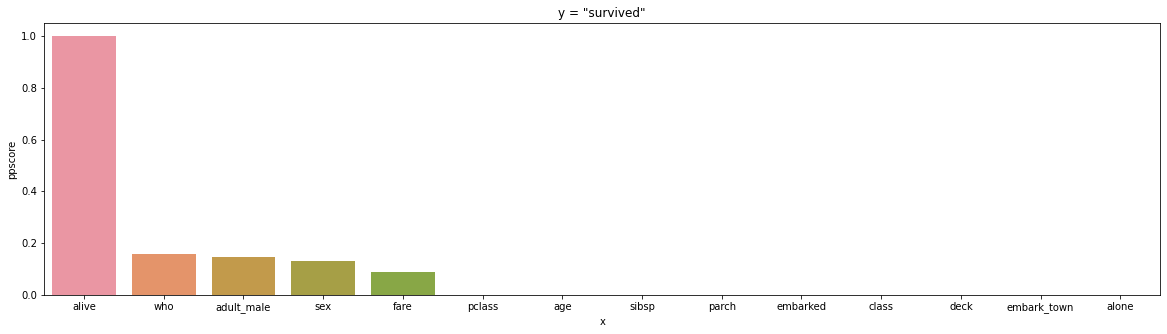

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (20, 5))
predictors_data = pps.predictors(data, y="survived")
sns.barplot(data=predictors_data, x="x", y="ppscore", ax = ax)
ax.set_title('y = "survived"')
plt.show()

In [43]:
pps.matrix(data).sort_values("ppscore", ascending = False).query('(ppscore != 1) & (ppscore > 0.25)')

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
40,sex,adult_male,0.901607,classification,True,weighted F1,0.537598,0.954503,DecisionTreeClassifier()
152,adult_male,sex,0.899708,classification,True,weighted F1,0.557800,0.955651,DecisionTreeClassifier()
98,fare,class,0.899223,classification,True,weighted F1,0.399551,0.939489,DecisionTreeClassifier()
91,fare,pclass,0.895931,regression,True,mean absolute error,0.691358,0.071949,DecisionTreeRegressor()
137,who,sex,0.888881,classification,True,weighted F1,0.557800,0.950863,DecisionTreeClassifier()
74,sibsp,alone,0.819832,classification,True,weighted F1,0.546577,0.918307,DecisionTreeClassifier()
102,fare,embark_town,0.743317,classification,True,weighted F1,0.608636,0.899543,DecisionTreeClassifier()
97,fare,embarked,0.743317,classification,True,weighted F1,0.608636,0.899543,DecisionTreeClassifier()
159,adult_male,who,0.741901,classification,True,weighted F1,0.482604,0.866461,DecisionTreeClassifier()
39,sex,who,0.735003,classification,True,weighted F1,0.482604,0.862892,DecisionTreeClassifier()
